In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import scipy as stats
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Regression/05%20Wine%20Quality%20White%20Dataset/Wine_Quality_white.csv')
data

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
data1=data.drop('Unnamed: 0',axis=1)

In [4]:
data1.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
data1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


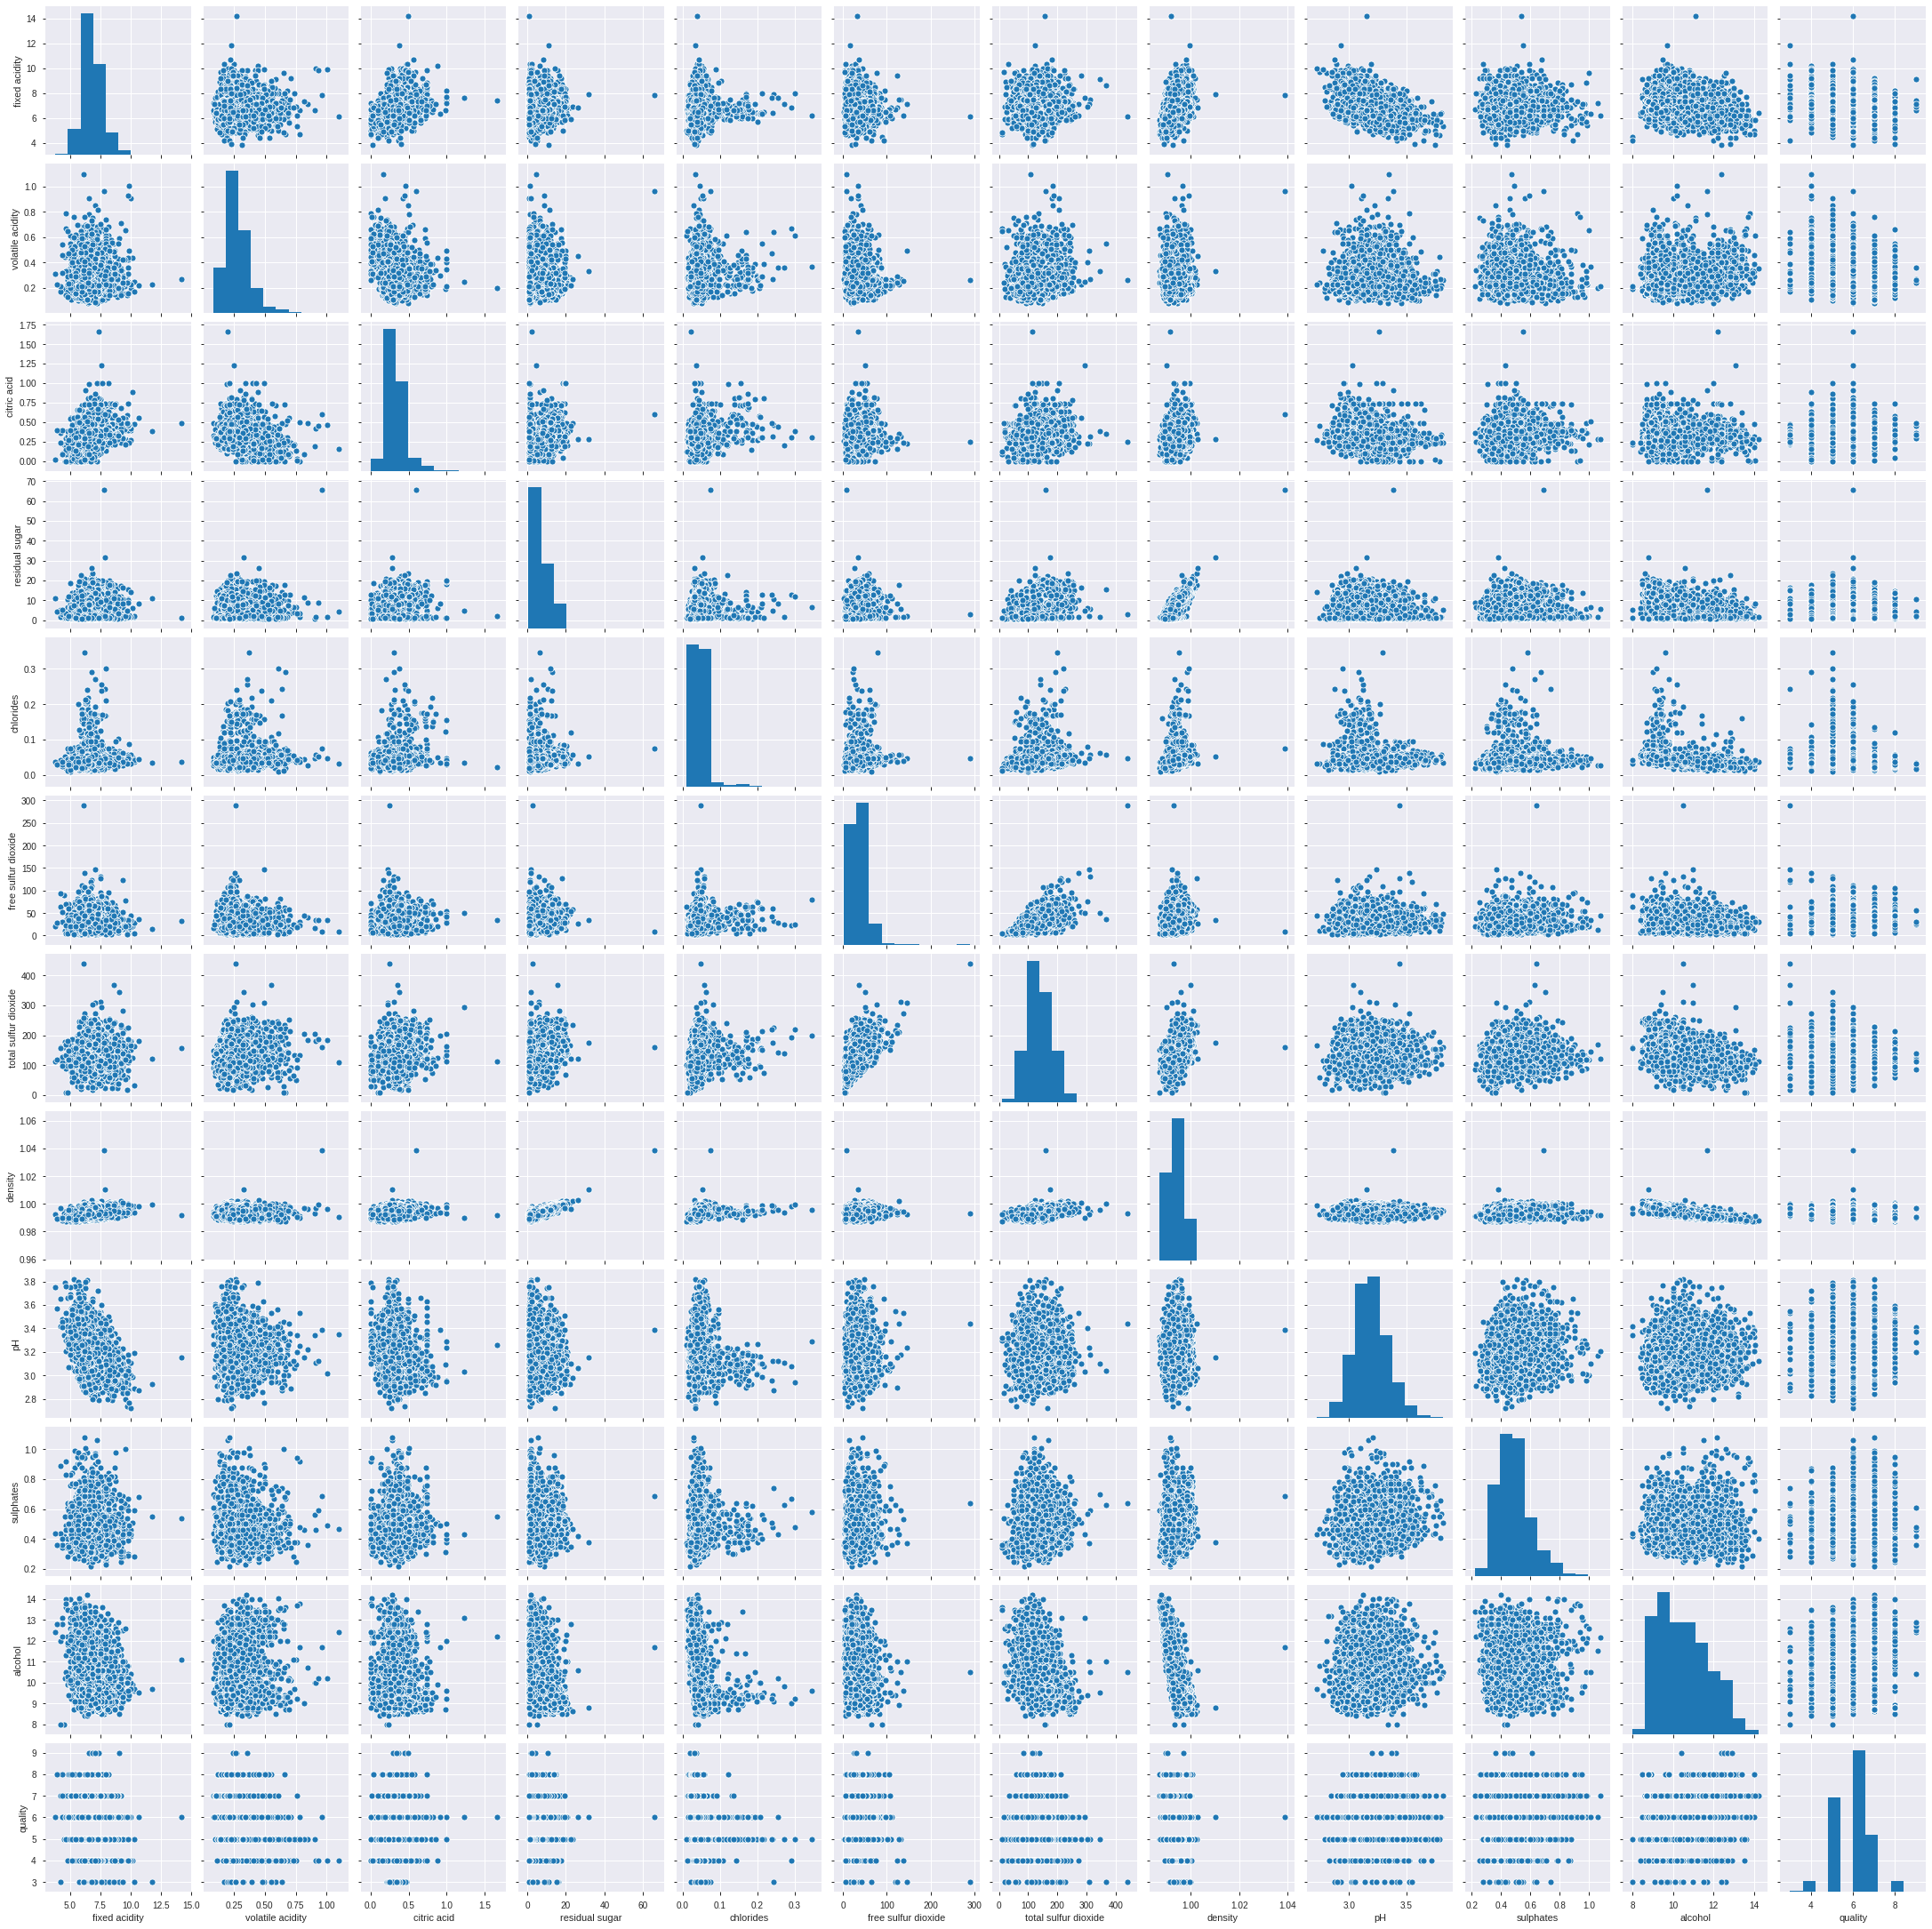

In [7]:
sns.pairplot(data1)

In [8]:
pandas_profiling.ProfileReport(data1)

In [9]:
data1.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
x_data=data1[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [13]:
y_data=data1['quality']

In [32]:
X_traine,X_test,Y_traine,Y_test,=train_test_split(x_data,y_data,test_size=0.20,random_state=0)

In [33]:
lr=LinearRegression()

In [34]:
lr.fit(X_traine,Y_traine)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
X_traine.shape

(3918, 11)

In [36]:
Y_traine.shape

(3918,)

In [37]:
X_test.shape

(980, 11)

In [38]:
Y_test.shape

(980,)

In [39]:
train_score=lr.score(X_traine,Y_traine)
train_score

0.28794312250910814

In [40]:
test_score=lr.score(X_test,Y_test)
test_score

0.2513476761101401

In [41]:
lr.coef_

array([ 1.06981517e-01, -1.81032516e+00, -1.51630286e-02,  9.29140769e-02,
       -5.56723628e-01,  4.43552129e-03, -2.86630409e-04, -1.88992556e+02,
        8.22368627e-01,  6.38975597e-01,  1.37843182e-01])

In [42]:
lr.intercept_

188.45929532076144

In [43]:
rr=Ridge(alpha=0.01)
rr.fit(X_traine,Y_traine) 

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
rr.coef_

array([-2.93791715e-02, -1.85819523e+00, -4.65729845e-02,  3.03715007e-02,
       -1.25139106e+00,  5.49019089e-03, -1.03768541e-03, -1.40355902e+01,
        2.37785906e-01,  4.04397129e-01,  3.39204136e-01])

In [45]:
rr.intercept_

15.866923963570185

In [46]:
Ridge_train_score=rr.score(X_traine,Y_traine)
Ridge_train_score

0.2796869695005856

In [47]:
Ridge_test_score=rr.score(X_test,Y_test)
Ridge_test_score

0.2502049655696822

In [48]:
rr100=Ridge(alpha=100)
rr100.fit(X_traine,Y_traine)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
rr100.coef_

array([-0.03768344, -0.50555031,  0.03495933,  0.02197605, -0.03662295,
        0.00785896, -0.002069  , -0.00157072,  0.12931481,  0.15305281,
        0.33964715])

In [50]:
rr100.intercept_

2.091441372256317

In [51]:
Ridge_train_score100=rr100.score(X_traine,Y_traine)
Ridge_train_score100

0.2521144684581852

In [52]:
Ridge_test_score100=rr100.score(X_test,Y_test)
Ridge_test_score100

0.2128425469593952

In [53]:
lo=Lasso(alpha=(0.01)**2)
lo.fit(X_traine,Y_traine)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
lo.coef_

array([-4.02152866e-02, -1.85709082e+00, -4.47461669e-02,  2.54212044e-02,
       -1.08113684e+00,  5.58645420e-03, -1.10910603e-03, -0.00000000e+00,
        1.90320759e-01,  3.77747913e-01,  3.56762167e-01])

In [55]:
lo.intercept_

1.99872333891717

In [56]:
Lasso_train_score=lo.score(X_traine,Y_traine)
Lasso_train_score

0.2782761691196858

In [57]:
Lasso_test_score=lo.score(X_test,Y_test)
Lasso_test_score

0.24798005084394792

In [58]:
lo100=Lasso(alpha=(100)**2)
lo100.fit(X_traine,Y_traine)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
lo100.coef_

array([-0., -0., -0., -0., -0.,  0., -0., -0.,  0.,  0.,  0.])

In [60]:
lo100.intercept_

5.892036753445636

In [61]:
Lasso_train_score100=lo100.score(X_traine,Y_traine)
Lasso_train_score100

0.0

In [62]:
Lasso_test_score100=lo100.score(X_test,Y_test)
Lasso_test_score100

-0.005656503687872849

In [63]:
print("linear regression trine score",train_score)
print("linear regression test score",test_score)
print("linear regression trine score low_alpha",Ridge_train_score)
print("linear regression test score high_alpha",Ridge_test_score)
print("linear regression trine score low_alpha",Ridge_train_score100)
print("linear regression test score high_alpha",Ridge_test_score100)
print("linear regression trine score low_alpha",Lasso_train_score)
print("linear regression test score high_alpha",Lasso_test_score)
print("linear regression trine score low_alpha",Lasso_train_score100)
print("linear regression test score high_alpha",Lasso_test_score100)

linear regression trine score 0.28794312250910814
linear regression test score 0.2513476761101401
linear regression trine score low_alpha 0.2796869695005856
linear regression test score high_alpha 0.2502049655696822
linear regression trine score low_alpha 0.2521144684581852
linear regression test score high_alpha 0.2128425469593952
linear regression trine score low_alpha 0.2782761691196858
linear regression test score high_alpha 0.24798005084394792
linear regression trine score low_alpha 0.0
linear regression test score high_alpha -0.005656503687872849


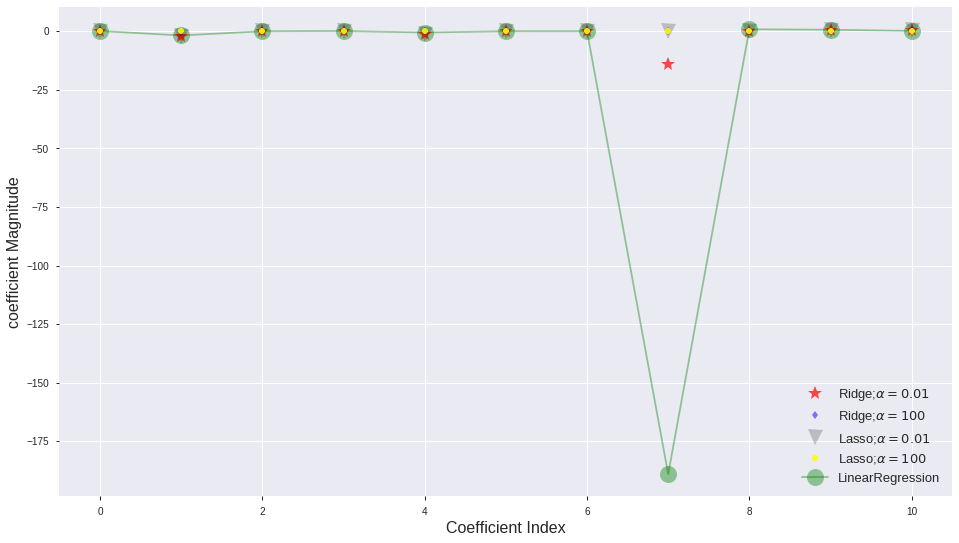

In [64]:
plt.figure(figsize=(16,9))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=15,color='red',
         label=r'Ridge;$\alpha=0.01$',zorder=7)
#Zorder for ordering the markes
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',
         label=r'Ridge;$\alpha=100$',zorder=7)
plt.plot(lo.coef_,alpha=0.2,linestyle='none',marker='v',markersize=15,color='black',
         label=r'Lasso;$\alpha=0.01$',zorder=7)
#Zorder for ordering the markes
plt.plot(lo100.coef_,alpha=0.9,linestyle='none',marker='8',markersize=6,color='yellow',
         label=r'Lasso;$\alpha=100$',zorder=7)

#alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,marker='o',markersize=17,color='green',label='LinearRegression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [65]:
from sklearn.linear_model import LassoCV,RidgeCV,Lasso,Ridge,ElasticNet
Lasso_CV=LassoCV()
Ridge_CV=RidgeCV()
rr=Ridge()
Lo=Lasso()
ENET=ElasticNet()

In [66]:
Lasso_CV.fit(X_traine,Y_traine)
Ridge_CV.fit(X_traine,Y_traine)
rr.fit(X_traine,Y_traine)
Lo.fit(X_traine,Y_traine)
ENET.fit(X_traine,Y_traine)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [67]:
Predicate=pd.DataFrame({'Lasso_CV_pred':Lasso_CV.predict(X_test),
            'Ridge_CV_pred':Ridge_CV.predict(X_test),
                        'rr':rr.predict(X_test),
                        'Lo':Lo.predict(X_test),'Actual_data':Y_test})
Predicate

,Lasso_CV_pred,Ridge_CV_pred,rr,Lo,Actual_data
2762,5.563017,5.532801,5.533225,5.700489,5
42,5.539033,5.485123,5.493086,5.781303,6
1419,6.015929,6.021064,6.014146,6.003715,7
3664,6.881758,6.821797,6.822980,5.890720,8
2125,5.916584,5.925179,5.924715,5.817664,5
...,...,...,...,...,...
2111,5.666364,5.698154,5.698086,5.923617,5
1828,5.679216,5.825789,5.820156,5.488433,6
1256,5.415693,5.532745,5.524452,5.793190,6
3335,5.608628,5.565994,5.566942,5.749104,6


In [68]:
#Recursive Feature Elimination:The Syntax
#import the class containing the feature selection method 
from sklearn.feature_selection import RFE

In [69]:
#create an instance of the class
rfeMod=RFE(rr,n_features_to_select=7)

In [70]:
#fit the instance on the data and then predict the expected value
rfeMod=rfeMod.fit(X_traine,Y_traine)
Y_predict=rfeMod.predict(X_test)

In [71]:
Y_predict

array([5.81366076, 5.56219491, 6.1627611 , 6.67420114, 5.7990926 ,
       4.4245438 , 6.4483215 , 6.25474754, 6.11472214, 5.67329779,
       5.72238311, 5.59883311, 5.32162885, 5.53814246, 6.29889796,
       5.81059119, 6.30292989, 5.7331964 , 6.78129981, 6.28234407,
       6.02945982, 6.14986065, 5.93093079, 5.92278437, 5.88622927,
       6.12920142, 5.17643363, 5.18134657, 6.28945106, 5.78975222,
       5.37314656, 5.97512235, 6.22607416, 6.34088978, 5.39673092,
       6.00497675, 6.18387796, 5.48327493, 6.29567666, 5.84593814,
       6.19874108, 6.22419012, 5.96051335, 5.58092604, 5.33098857,
       6.43959315, 5.39608498, 6.37626795, 6.53339623, 5.74964373,
       6.54562546, 6.3101221 , 5.53093608, 5.81055686, 6.23853522,
       6.08899101, 5.8252251 , 6.38625362, 4.98369453, 6.67000285,
       5.76902403, 5.24030369, 6.1933929 , 6.11489142, 6.13271297,
       6.07016755, 5.74926241, 5.41379803, 5.18814299, 5.29011341,
       6.39217472, 5.1024505 , 5.53250877, 6.32306682, 6.19714

In [72]:
Y_test

2762    5
42      6
1419    7
3664    8
2125    5
       ..
2111    5
1828    6
1256    6
3335    6
230     4
Name: quality, Length: 980, dtype: int64